# 1. Imports & Getting Data

In [4]:
# imports

import warnings
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
import lightgbm as lgb
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from helper_files.helpers_ import DataAnalysisPipeline, error_metrics, plot_importance
import warnings
from prediction_pipeline import main
warnings.filterwarnings("ignore")

In [5]:
# options

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)
pd.set_option('display.width', 100)
warnings.simplefilter(action='ignore', category=Warning)

In [6]:
# getting data

df = pd.read_csv("data/train.csv")

In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


* * * 
# 2. Exploratory data analysis

In [8]:
# getting variable types

numerical_, num_but_categorical, categorical, categorical_over_threshold = DataAnalysisPipeline(dataframe=df).get_variable_type("Id", threshold=25)

In [9]:
DataAnalysisPipeline(df).info(only_isnull=True)

,nunique,isnull,type,count,mean,std,min,25%,50%,75%,max,iscat
LotFrontage,110,259,float64,1201.0,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0,Numerical
Alley,2,1369,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Categorical
MasVnrType,4,8,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Categorical
MasVnrArea,327,8,float64,1452.0,103.685262,181.066207,0.0,0.0,0.0,166.0,1600.0,Numerical
BsmtQual,4,37,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Categorical
BsmtCond,4,37,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Categorical
BsmtExposure,4,38,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Categorical
BsmtFinType1,6,37,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Categorical
BsmtFinType2,6,38,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Categorical
Electrical,5,1,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Categorical


* * *
# 3. Feature Engineering

## 3.1. NA Values

<AxesSubplot:>

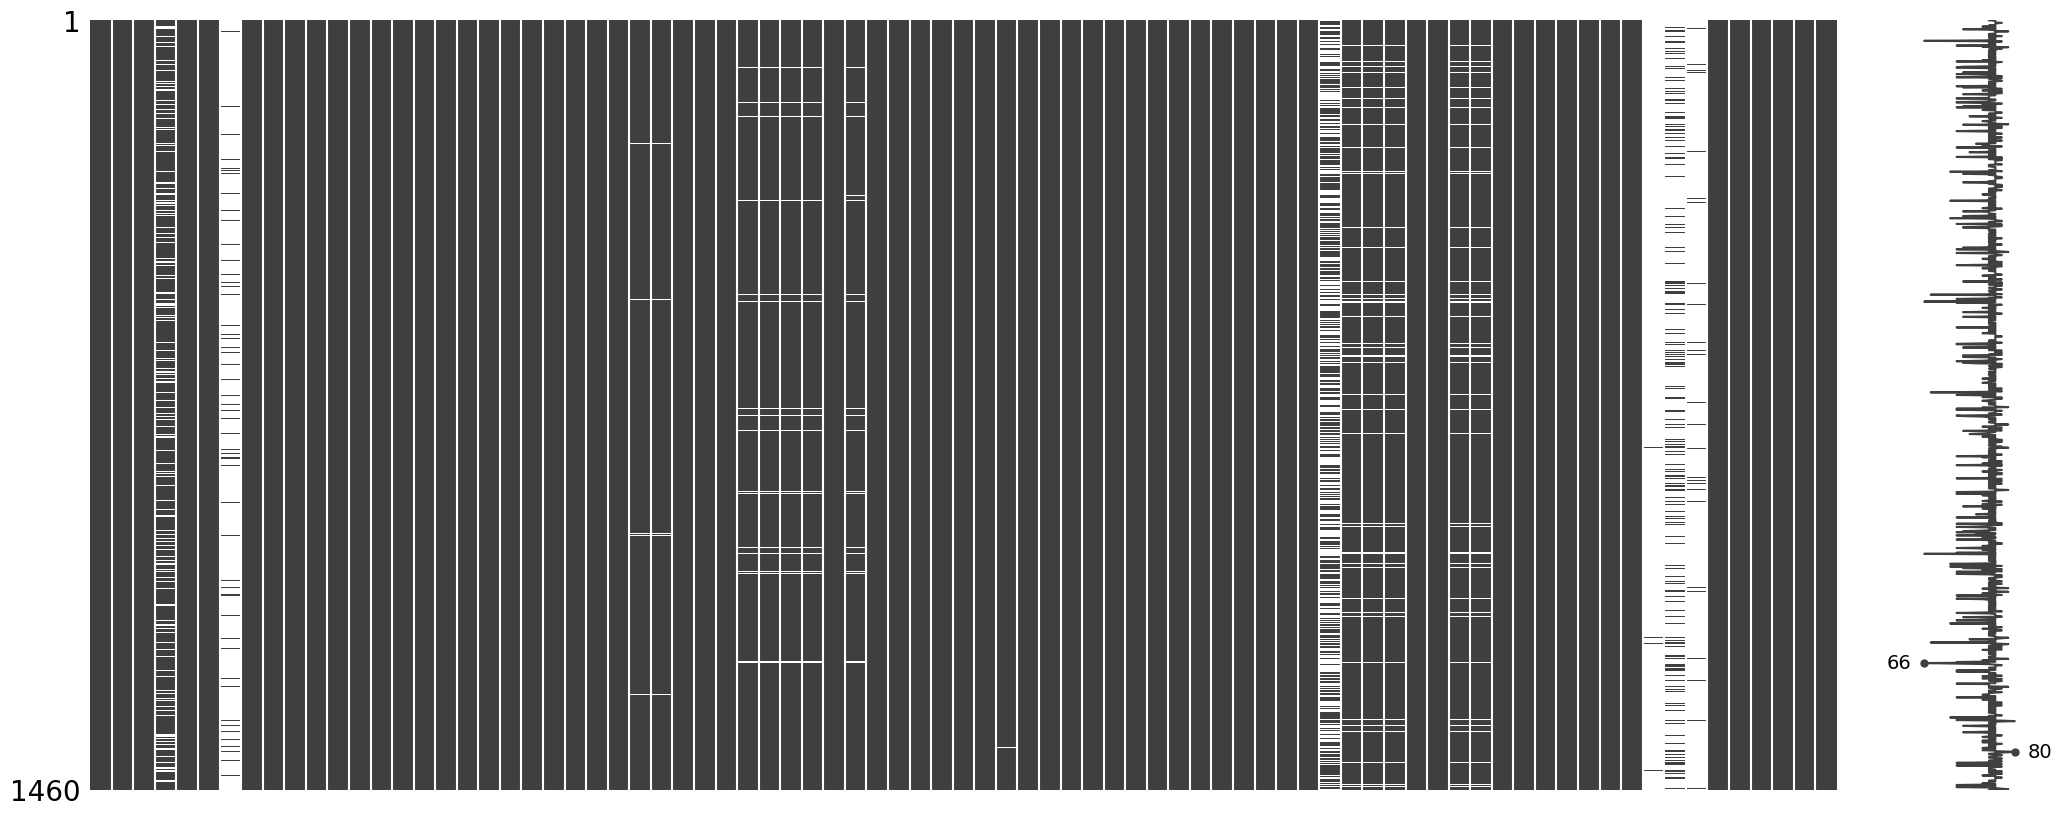

In [10]:
msno.matrix(df)

* Basement Group

Those houses haven't a basement. We have to specify them like "NO_BASEMENT" and their basement area have to be "0".


In [11]:
df[df["BsmtFinType1"].isnull() == True][["BsmtQual", 
                                         "BsmtCond", 
                                         "BsmtExposure", 
                                         "BsmtFinSF1", 
                                         "BsmtFinType2", 
                                         "BsmtFinSF2", 
                                         "BsmtUnfSF", 
                                         "TotalBsmtSF"]].head(10)

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
17,NaN,NaN,NaN,0,NaN,0,0,0
39,NaN,NaN,NaN,0,NaN,0,0,0
90,NaN,NaN,NaN,0,NaN,0,0,0
102,NaN,NaN,NaN,0,NaN,0,0,0
156,NaN,NaN,NaN,0,NaN,0,0,0
182,NaN,NaN,NaN,0,NaN,0,0,0
259,NaN,NaN,NaN,0,NaN,0,0,0
342,NaN,NaN,NaN,0,NaN,0,0,0
362,NaN,NaN,NaN,0,NaN,0,0,0
371,NaN,NaN,NaN,0,NaN,0,0,0


In [12]:
df[["BsmtFinType1", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType2"]] = df[["BsmtFinType1", 
                                                                                   "BsmtQual", 
                                                                                   "BsmtCond", 
                                                                                   "BsmtExposure", 
                                                                                   "BsmtFinType2"]].fillna("NO_BSMT")

In [13]:
df[["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF"]] = df[["BsmtFinSF1",
                                                                   "BsmtFinSF2", 
                                                                   "BsmtUnfSF", 
                                                                   "TotalBsmtSF"]].fillna(0)

* Fire Place

In [14]:
# Fireplaces.sum() have to equal 0 if that observation units haven't a fireplace
df[df["FireplaceQu"].isnull() == True]["Fireplaces"].sum()

0

In [15]:
# And now we can fillna with "No_fireplace"
df["FireplaceQu"].fillna("No_FirePlace", inplace=True)

* Garage

In [16]:
# GarageType & GarageYrBlt & GarageFinish & GarageQual & GarageCond have to equal "NA"
df[df["GarageType"].isnull() == True][["GarageYrBlt",
                                      "GarageFinish",
                                      "GarageCars",
                                      "GarageArea",
                                      "GarageQual",
                                      "GarageCond"]].head()

,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,0,0,NaN,NaN
48,NaN,NaN,0,0,NaN,NaN
78,NaN,NaN,0,0,NaN,NaN
88,NaN,NaN,0,0,NaN,NaN
89,NaN,NaN,0,0,NaN,NaN


In [17]:
# GarageCars & GarageArea.sum() have to equal 0 
df[df["GarageType"].isnull() == True][["GarageCars", "GarageArea",]].sum()

GarageCars    0
GarageArea    0
dtype: int64

In [18]:
df[["GarageType", "GarageFinish", "GarageQual", "GarageCond"]] = df[["GarageType",
                                                                     "GarageFinish",
                                                                     "GarageQual",
                                                                     "GarageCond"]].fillna("No_Garage")

In [19]:
df["GarageYrBlt"].fillna(df["GarageYrBlt"].mean(), inplace=True)

* Alley

In [20]:
df["Alley"].fillna("No_alley_access", inplace=True)

* MasVnr

In [21]:
df["MasVnrType"].fillna("None", inplace=True)
df["MasVnrArea"].fillna(0, inplace=True)

for index in range(len(df)):
    if (df["MasVnrType"].iloc[index] == "None") & (df["MasVnrArea"].iloc[index] > 0):
        df["MasVnrArea"].iloc[index] = 0

* PoolQC

In [22]:
# there isn't looks any inconsistent situation when I check pool quality with the pool area.
df[df["PoolQC"].isnull() == True]["PoolArea"].sum()

0

In [23]:
# filling "NA" with no pool
df["PoolQC"].fillna("No_pool", inplace=True)

* Fence

In [24]:
# filling "NA" with no fence
df["Fence"].fillna("No_fence", inplace=True)

* MiscFeature

In [25]:
df["MiscFeature"].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [26]:
# i prefer to drop those variables
df.drop(["MiscFeature", "MiscVal"], axis=1, inplace=True)

* LotFrontage

In [27]:
# filling with median

df["LotFrontage"].fillna(df["LotFrontage"].median(), inplace=True)

* Electrical

In [28]:
# filling "Electrical" with mode
df["Electrical"].fillna(df["Electrical"].value_counts().idxmax(), inplace=True)

In [29]:
DataAnalysisPipeline(df).info(only_isnull=True)

,nunique,isnull,type,count,mean,std,min,25%,50%,75%,max,iscat


In the end, there are no na values left.

## 3.2. Outliers

I am going to examine all numerical variables if it's nunique over 150. And after that, I will decide what can I do with the variable.

Firstly, I will visualize graphs, and after I will decide whether is an outlier or not.

In [30]:
nunique_over_150 = [col for col in numerical_ if df[col].nunique() > 150]

* SalePrice

Only 9 houses are priced over 500k. I remove them.

Value of SalePrice that over 500k: 9


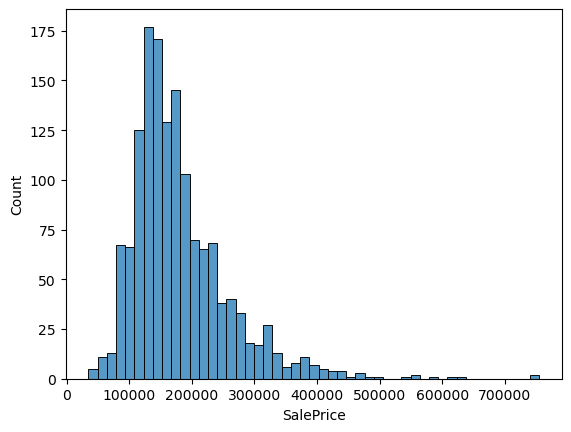

In [31]:
sns.histplot(df["SalePrice"])
print("Value of SalePrice that over 500k:", df[(df["SalePrice"] > 500000)].shape[0])

In [32]:
df = df[~(df["SalePrice"] > 400000)]
df = df[~(df["SalePrice"] < 60000)]

* LotArea

The 'numerical_plot()' function is plotting 3 different graphs for getting insights about variables.

In this case, my focus is a correlation graph according to the target variable("SalePrice").

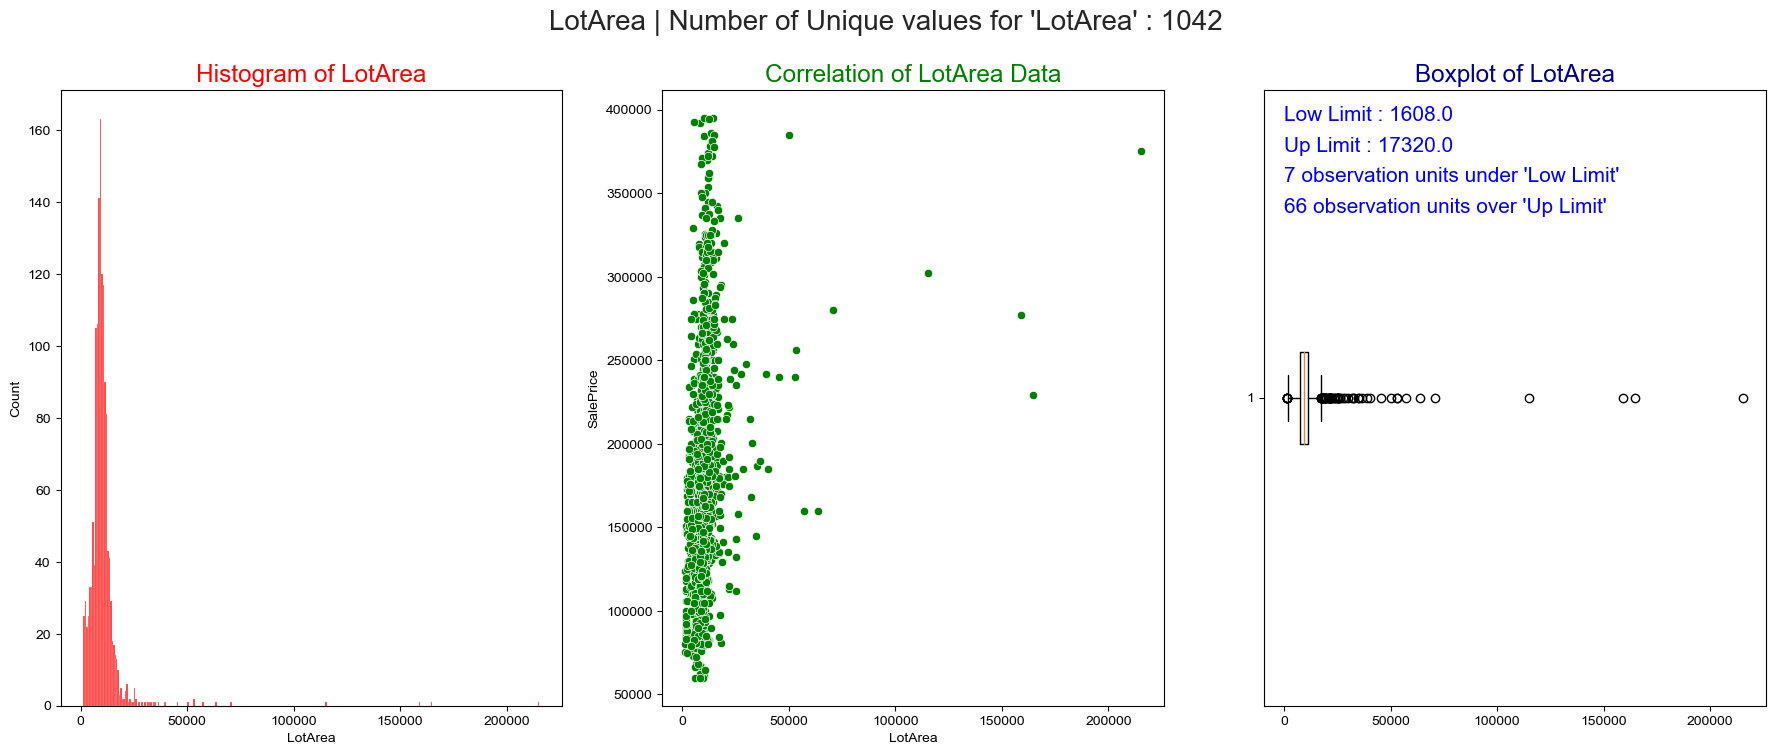

In [33]:
DataAnalysisPipeline(dataframe=df).numerical_plot(col=nunique_over_150[0], target="SalePrice")

The 'iqr_values()' function is calculating iqr limits that based on the quantile values you entered.

You can change outliers with limits if you set it 'replace_with_limit' as 'True'.

In [34]:
DataAnalysisPipeline(df).iqr_values(col=nunique_over_150[0], 
                                    upper_quantile=0.90, 
                                    lower_quantile=0.02, 
                                    info=True, 
                                    replace_with_limit=True)

Low Limit : -3775.0
 Up Limit : 20046.0
 0 observation units under 'Low Limit'
 46 observation units over 'Up Limit'


(-3775.0, 20046.0, 0, 46)

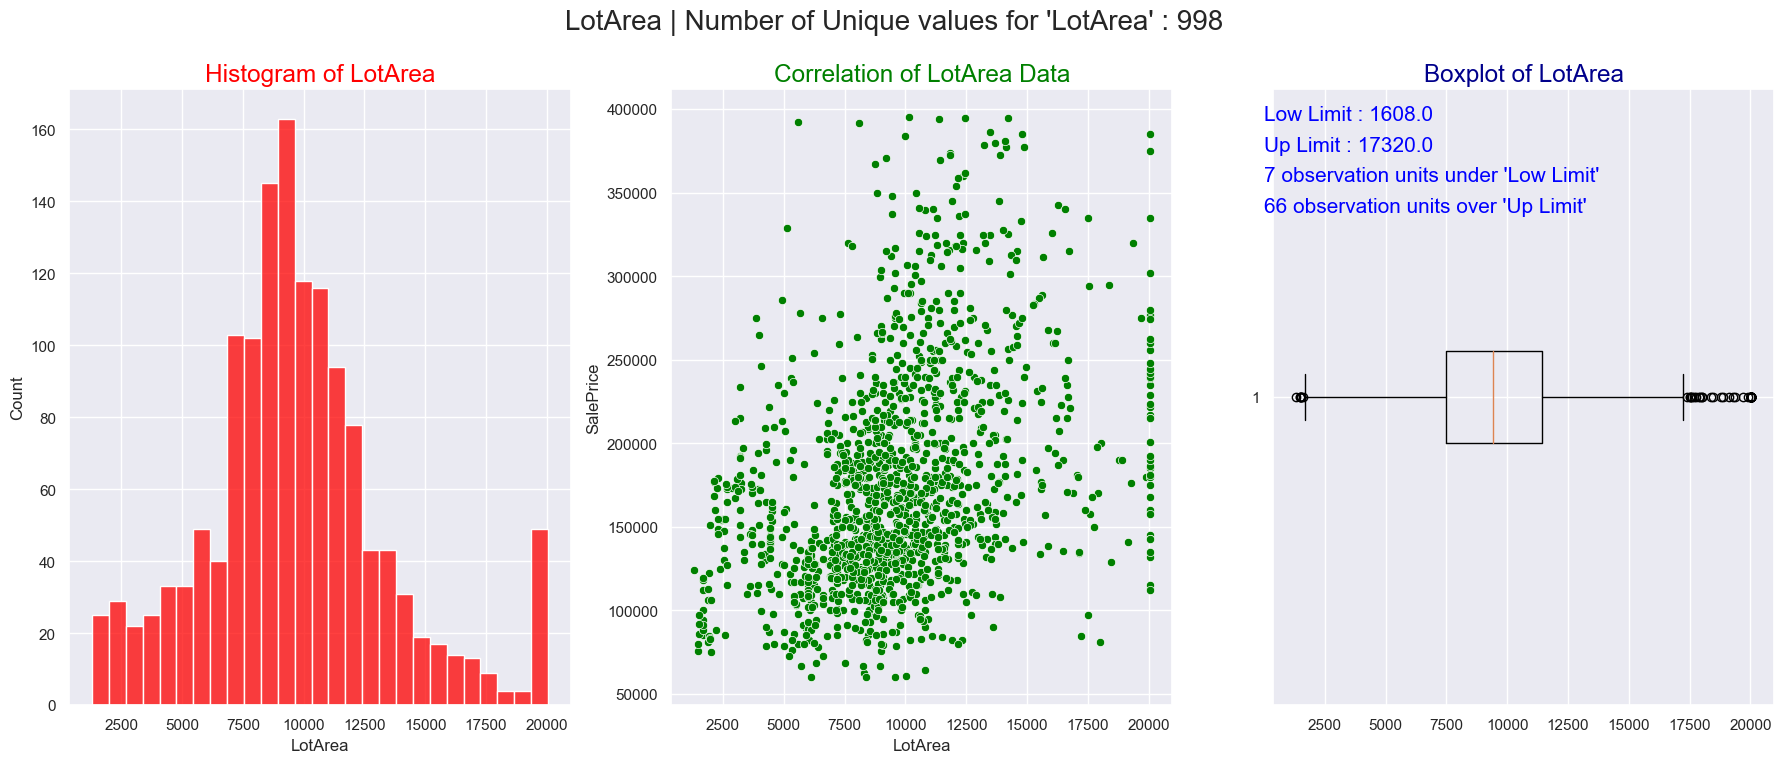

In [35]:
DataAnalysisPipeline(dataframe=df).numerical_plot(col=nunique_over_150[0], target="SalePrice")

* MasVnrArea

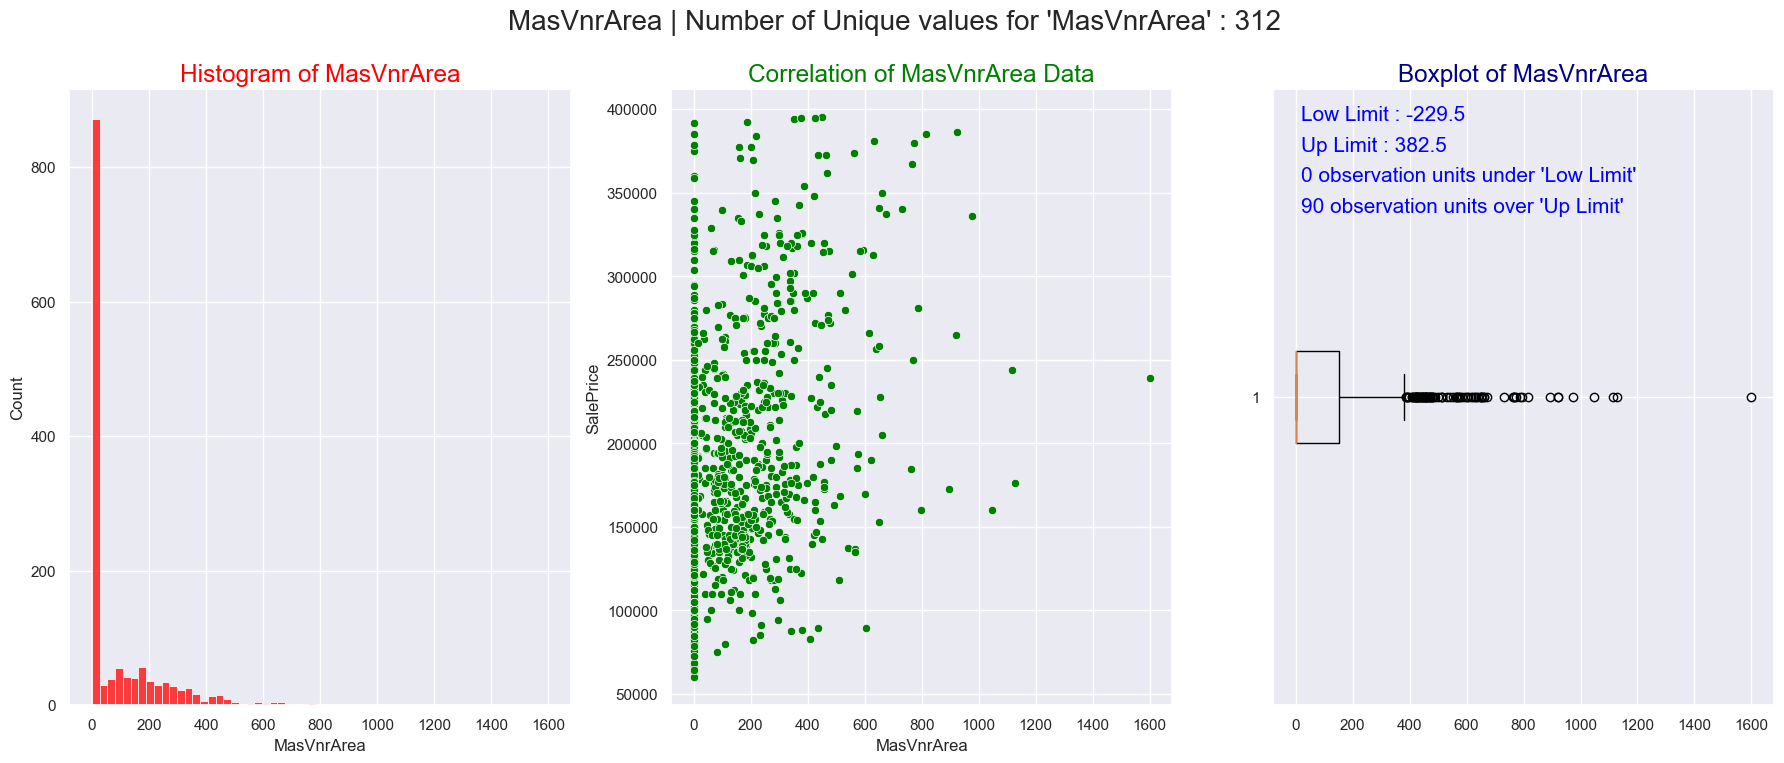

In [36]:
DataAnalysisPipeline(dataframe=df).numerical_plot(col=nunique_over_150[1], target="SalePrice")

In [37]:
DataAnalysisPipeline(df).iqr_values(col=nunique_over_150[1], 
                                    upper_quantile=0.90, 
                                    lower_quantile=0.01, 
                                    info=True, 
                                    replace_with_limit=True)

Low Limit : -229.5
 Up Limit : 541.5
 0 observation units under 'Low Limit'
 39 observation units over 'Up Limit'


(-229.5, 541.5, 0, 39)

* BsmtFinSF1

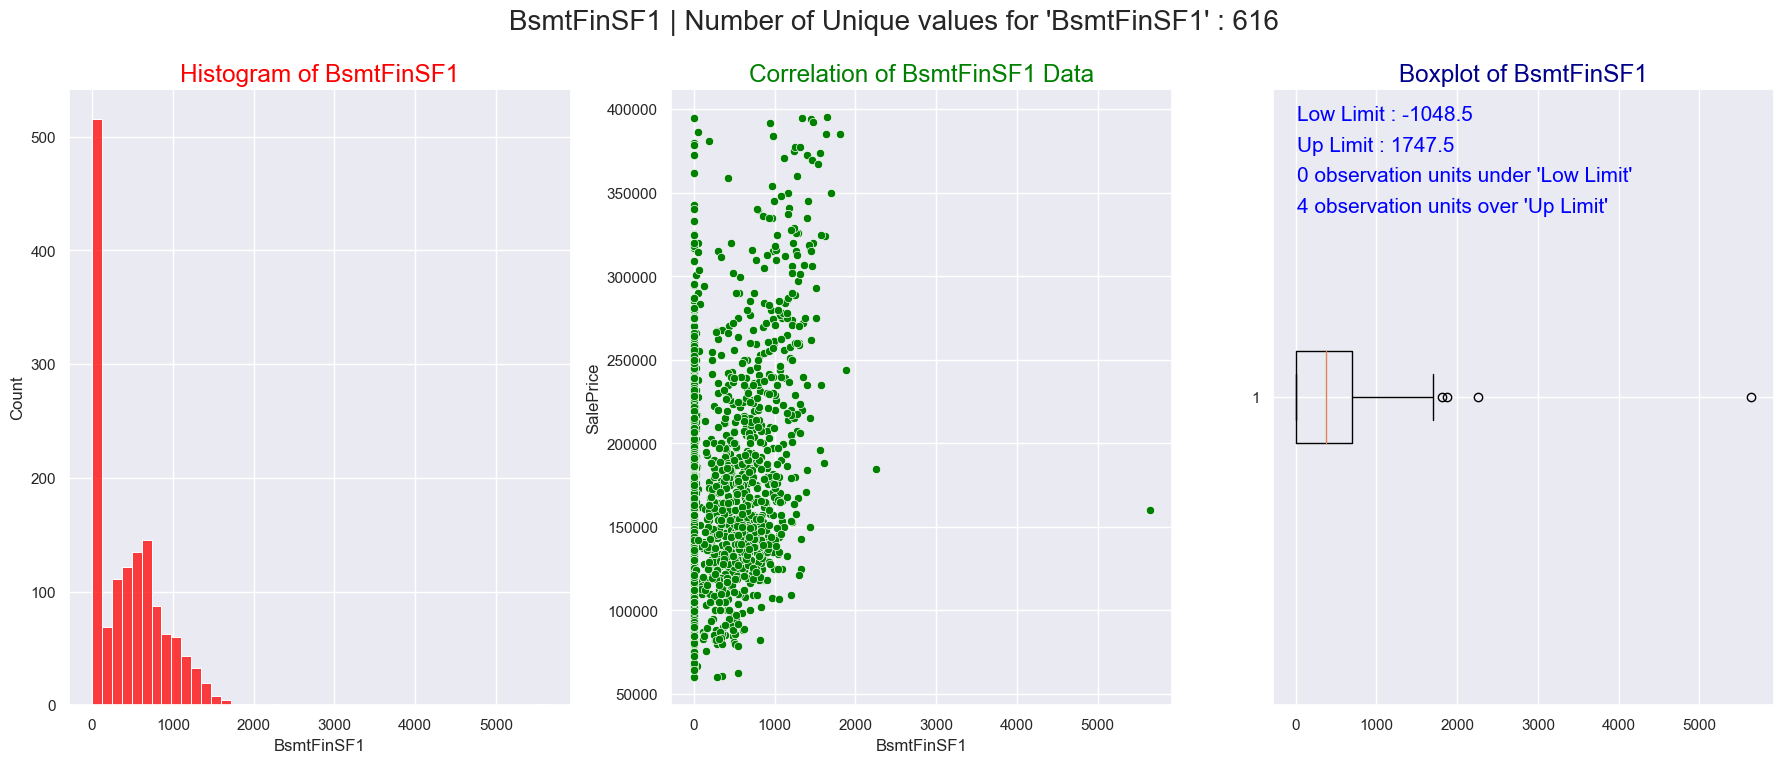

In [38]:
DataAnalysisPipeline(dataframe=df).numerical_plot(col=nunique_over_150[2], target="SalePrice")

In [39]:
DataAnalysisPipeline(df).iqr_values(col=nunique_over_150[2], 
                                    upper_quantile=0.90, 
                                    lower_quantile=0.08, 
                                    info=True, 
                                    replace_with_limit=True)

Low Limit : -1048.5
 Up Limit : 2084.5
 0 observation units under 'Low Limit'
 2 observation units over 'Up Limit'


(-1048.5, 2084.5, 0, 2)

* BsmtUnfSF

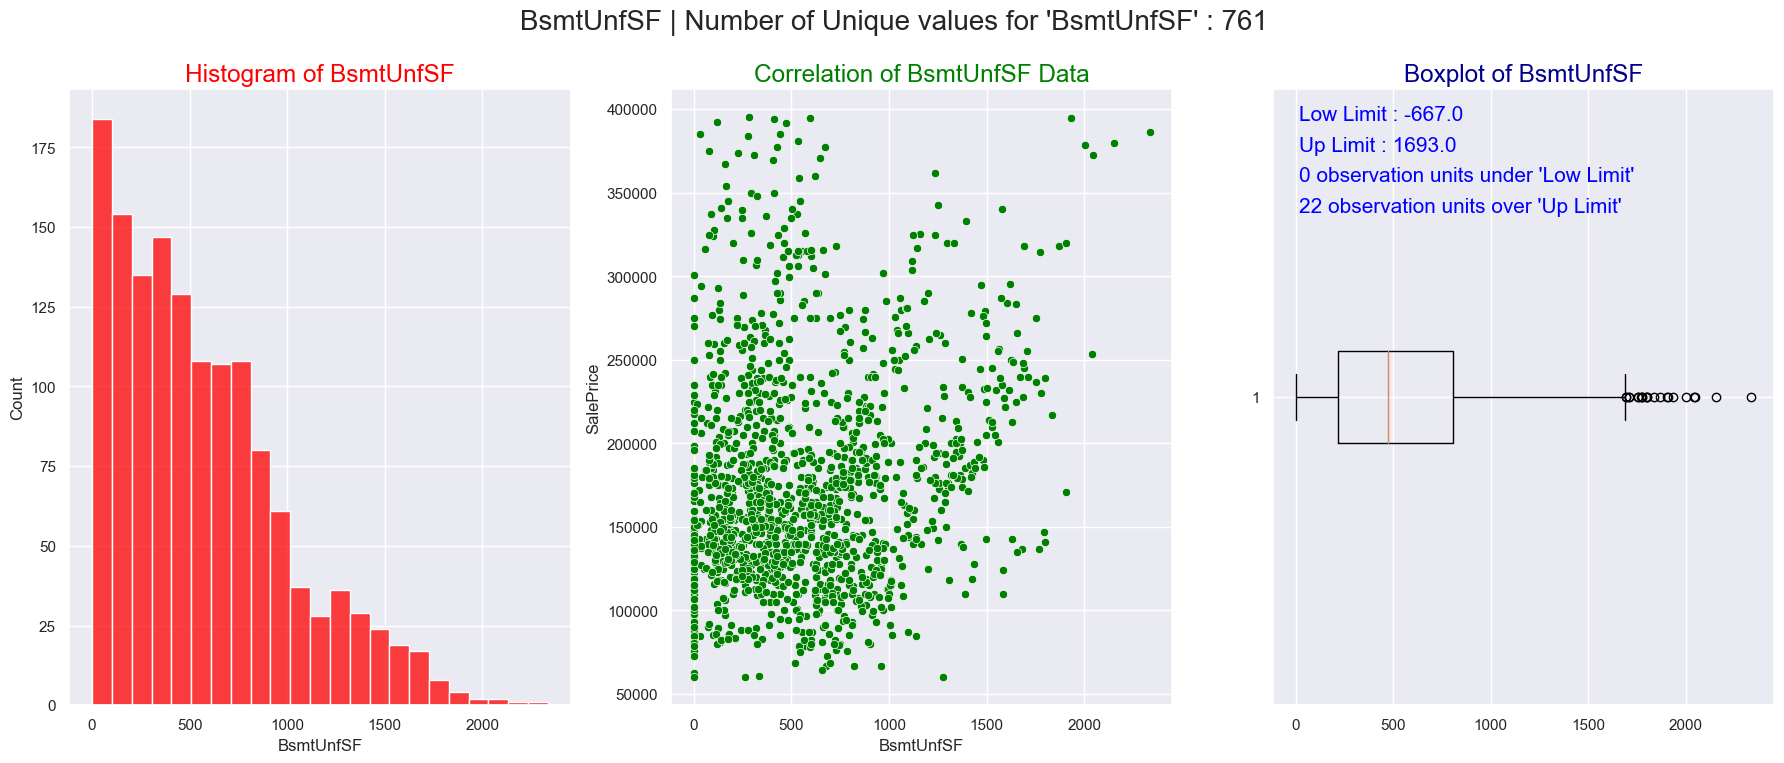

In [40]:
DataAnalysisPipeline(dataframe=df).numerical_plot(col=nunique_over_150[3], target="SalePrice")

* TotalBsmtSf

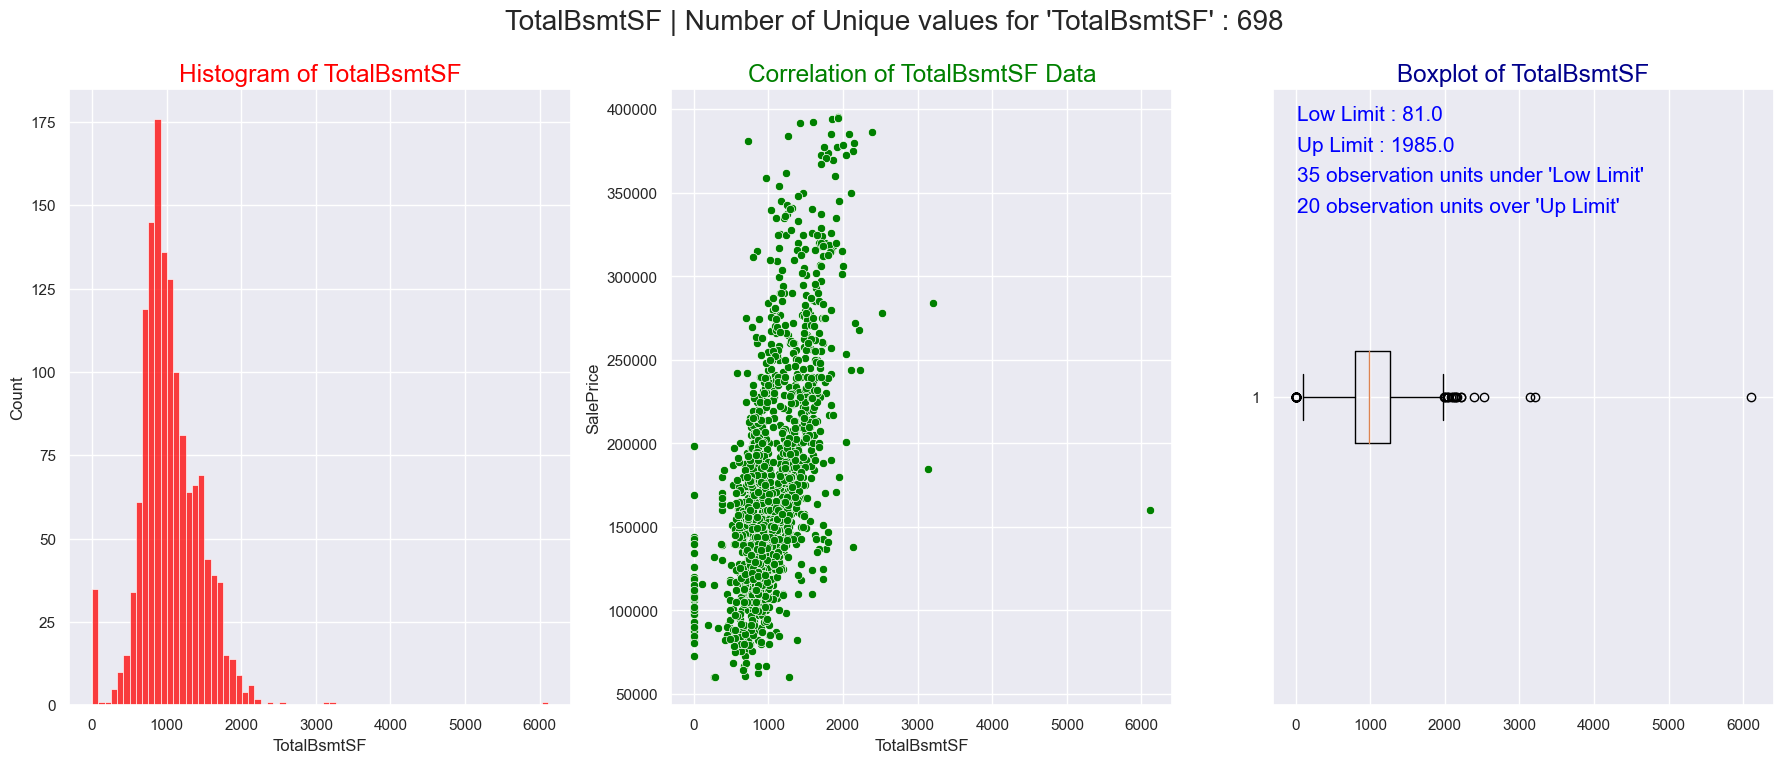

In [41]:
DataAnalysisPipeline(dataframe=df).numerical_plot(col=nunique_over_150[4], target="SalePrice")

In [42]:
DataAnalysisPipeline(df).iqr_values(col=nunique_over_150[4], 
                                    upper_quantile=0.90, 
                                    lower_quantile=0.04, 
                                    info=True,  replace_with_limit=True)

Low Limit : -252.79999999999995
 Up Limit : 2287.0
 0 observation units under 'Low Limit'
 5 observation units over 'Up Limit'


(-252.79999999999995, 2287.0, 0, 5)

* 1stFlrSF

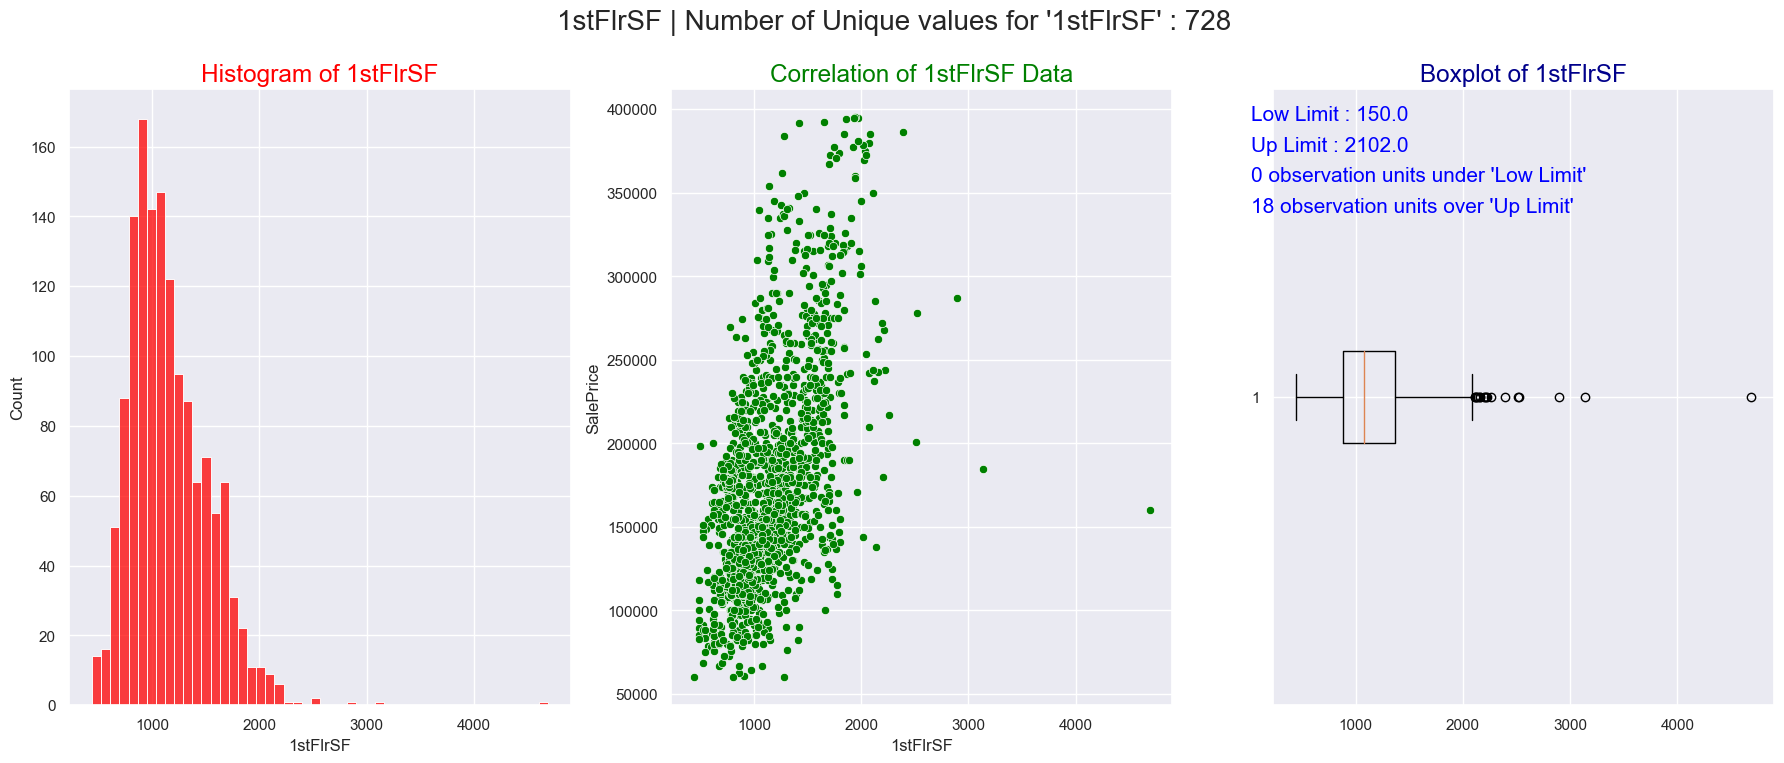

In [43]:
DataAnalysisPipeline(dataframe=df).numerical_plot(col=nunique_over_150[5], target="SalePrice")

In [44]:
DataAnalysisPipeline(df).iqr_values(col=nunique_over_150[5], 
                                    upper_quantile=0.90, 
                                    lower_quantile=0.04, 
                                    info=True, 
                                    replace_with_limit=True)

Low Limit : -61.59999999999991
 Up Limit : 2386.0
 0 observation units under 'Low Limit'
 6 observation units over 'Up Limit'


(-61.59999999999991, 2386.0, 0, 6)

* 2ndFlrSF

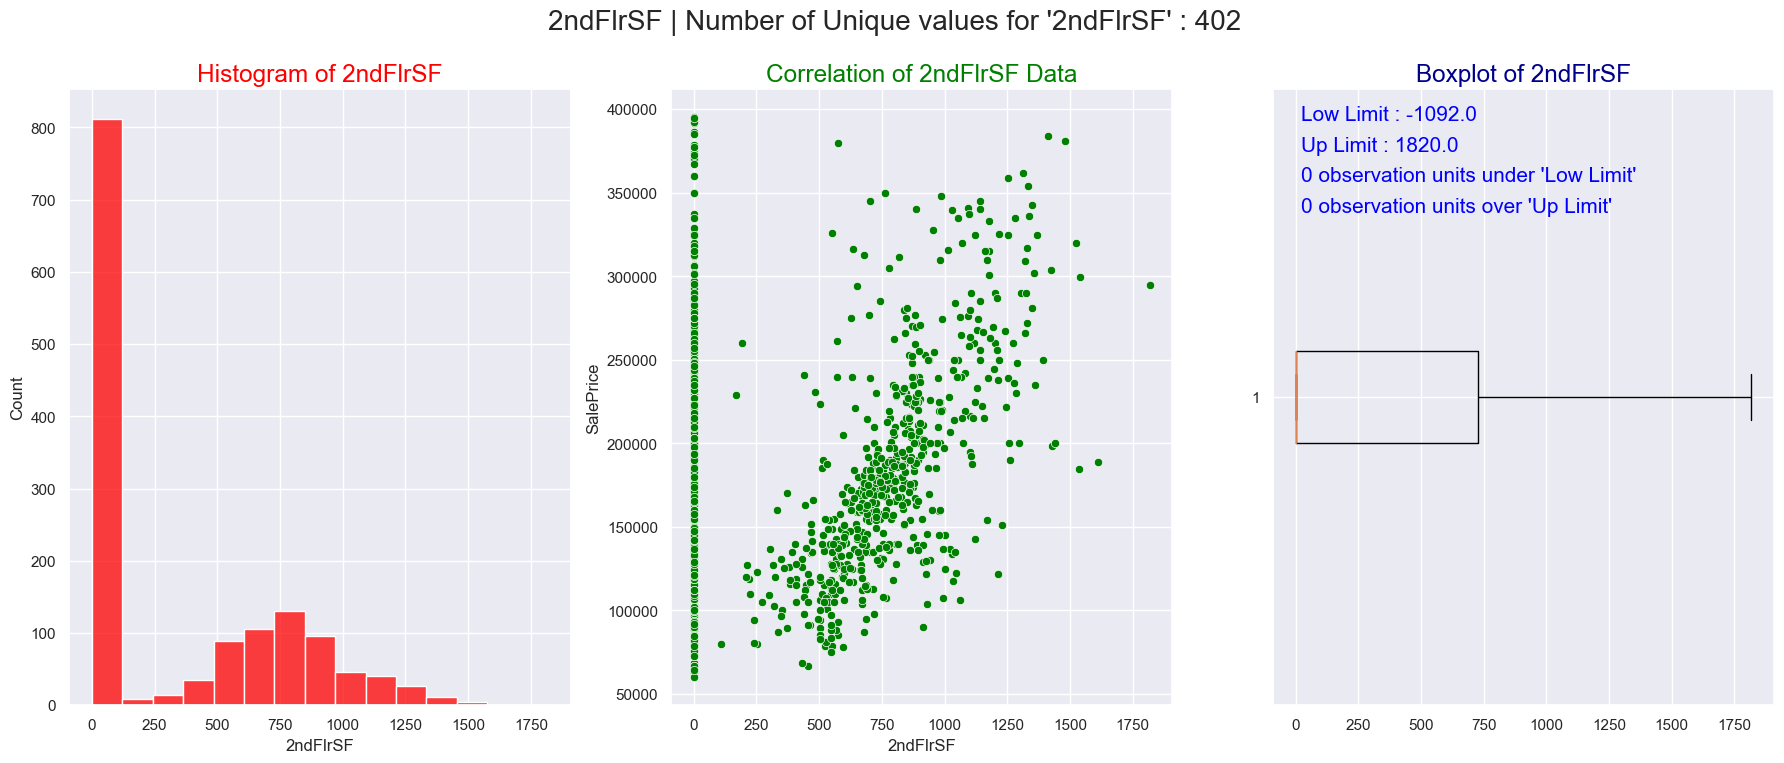

In [45]:
DataAnalysisPipeline(dataframe=df).numerical_plot(col=nunique_over_150[6], target="SalePrice")

GrLivArea

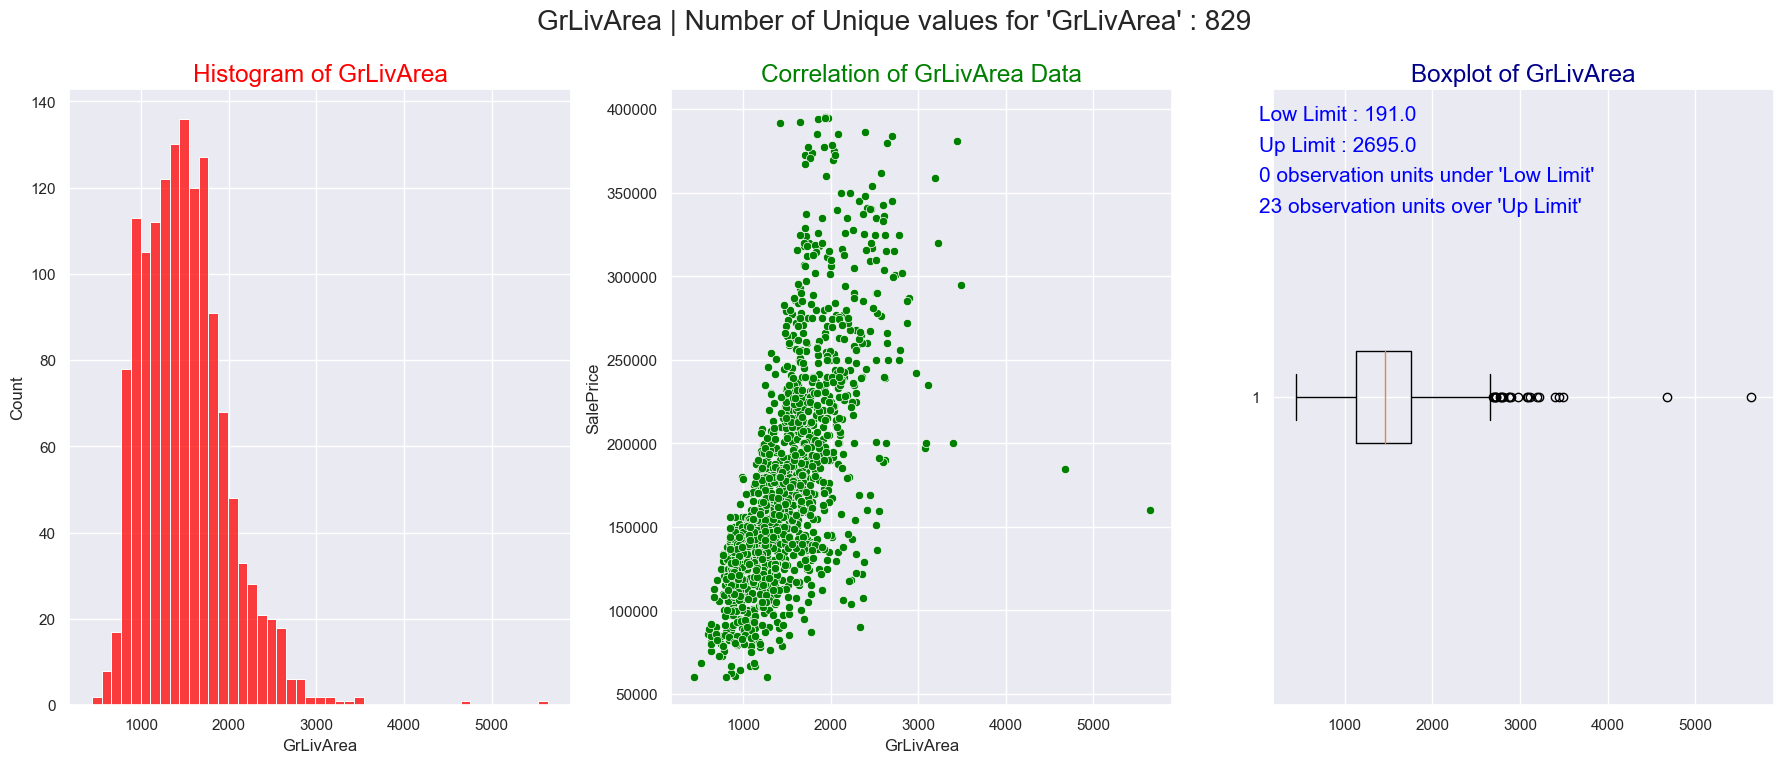

In [46]:
DataAnalysisPipeline(dataframe=df).numerical_plot(col=nunique_over_150[7], target="SalePrice")

In [47]:
DataAnalysisPipeline(df).iqr_values(col=nunique_over_150[7], 
                                    upper_quantile=0.90, 
                                    lower_quantile=0.1, 
                                    info=True, 
                                    replace_with_limit=True)

Low Limit : -27.0
 Up Limit : 3049.0
 0 observation units under 'Low Limit'
 10 observation units over 'Up Limit'


(-27.0, 3049.0, 0, 10)

* Garage Area

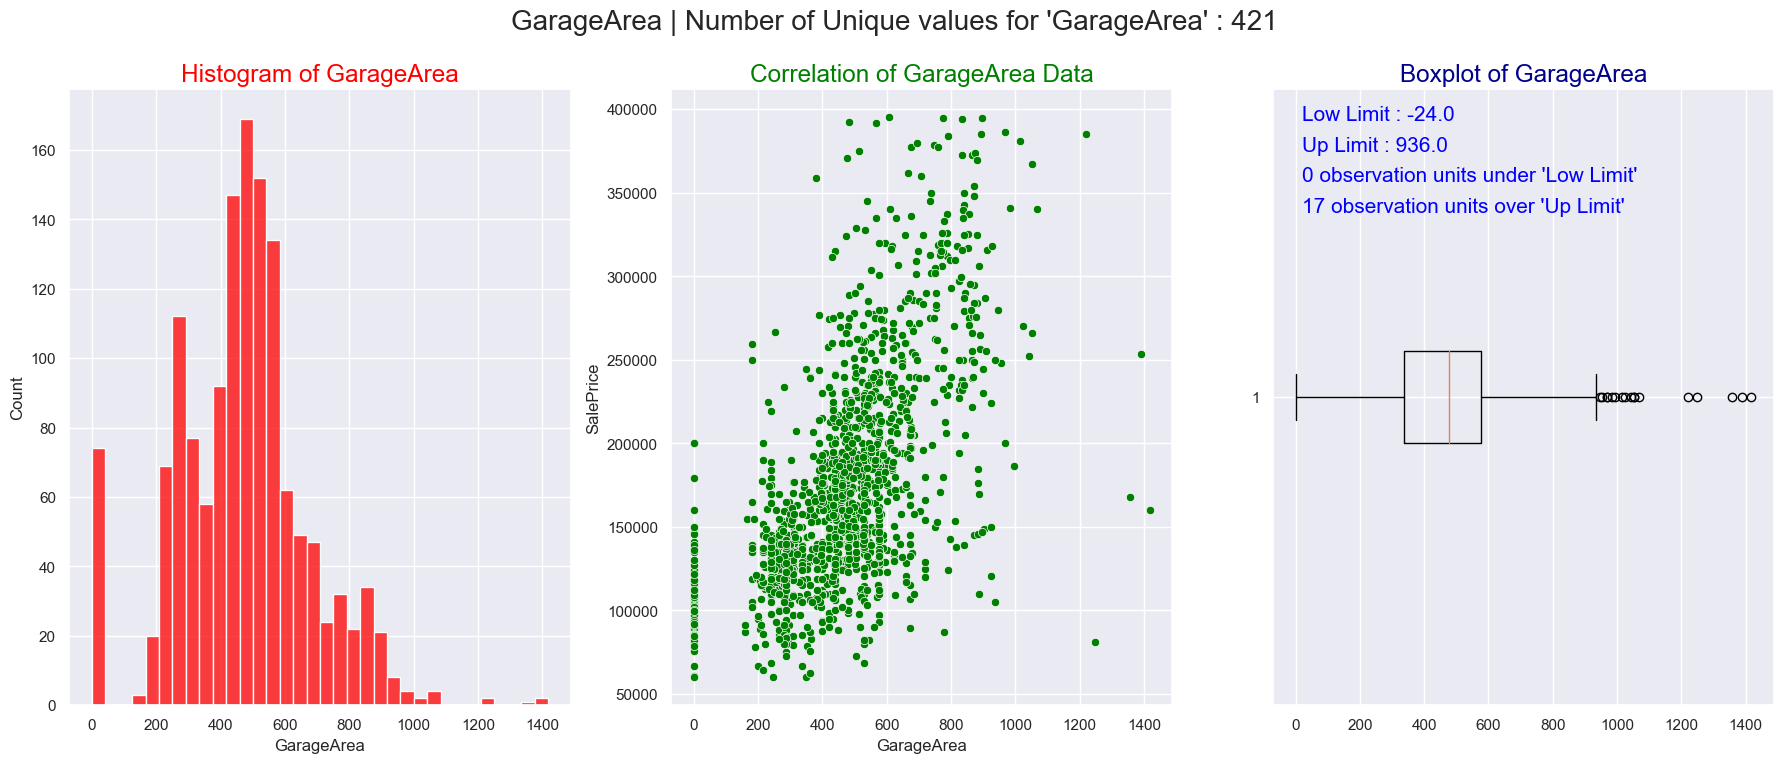

In [48]:
DataAnalysisPipeline(dataframe=df).numerical_plot(col=nunique_over_150[8], target="SalePrice")

In [49]:
DataAnalysisPipeline(df).iqr_values(col=nunique_over_150[8],
                                    upper_quantile=0.87, 
                                    lower_quantile=0.11, 
                                    info=True, 
                                    replace_with_limit=True)

Low Limit : -120.0
 Up Limit : 1032.4
 0 observation units under 'Low Limit'
 9 observation units over 'Up Limit'


(-120.0, 1032.4, 0, 9)

* WoodDeckSF

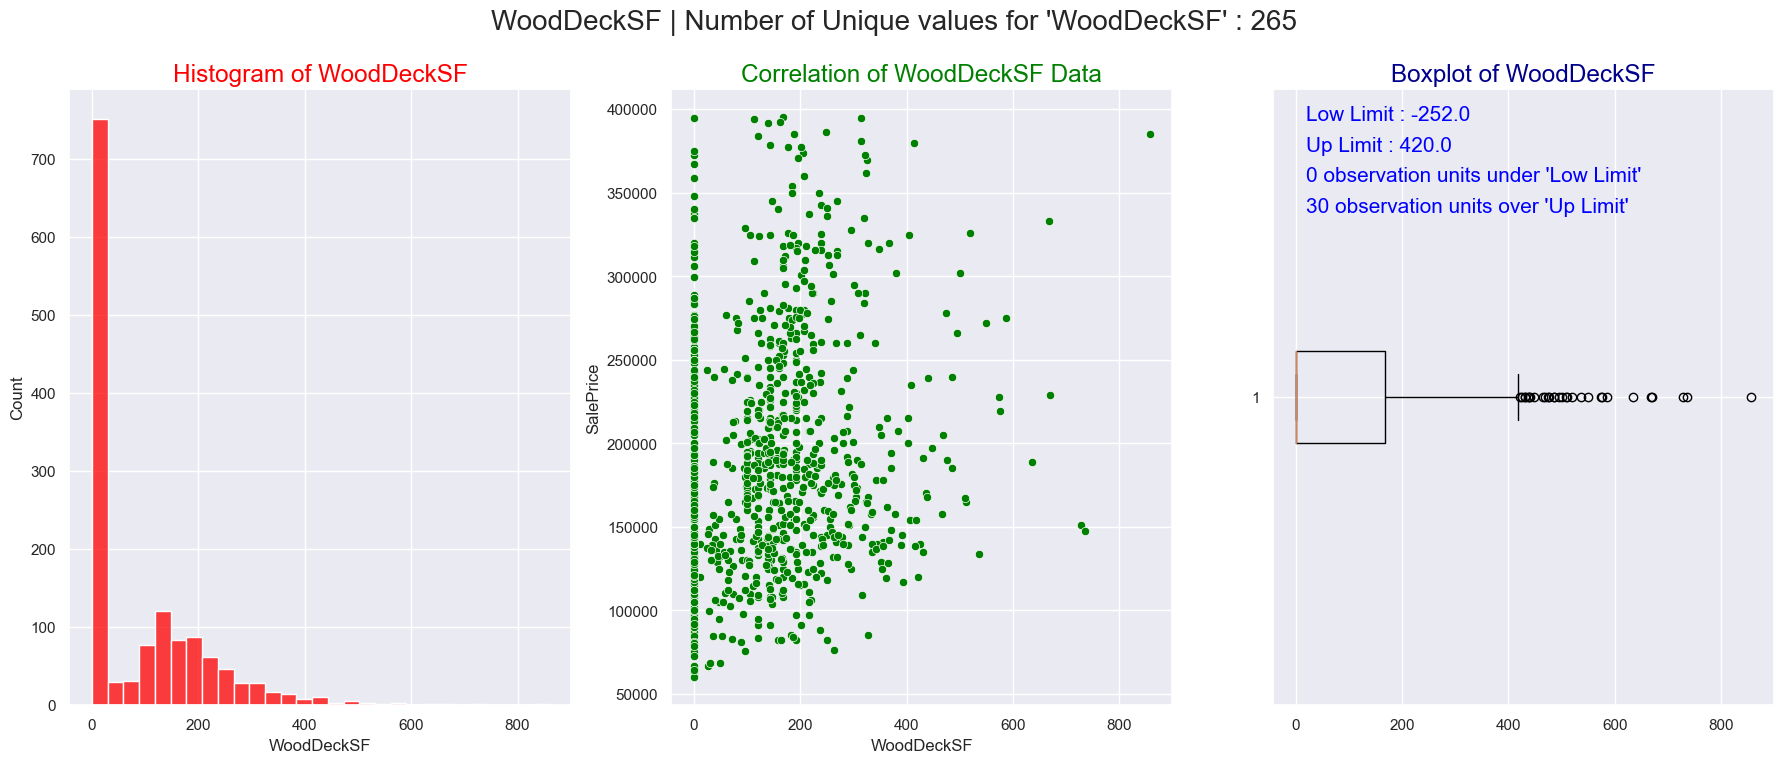

In [50]:
DataAnalysisPipeline(dataframe=df).numerical_plot(col=nunique_over_150[9], target="SalePrice")

In [51]:
DataAnalysisPipeline(df).iqr_values(col=nunique_over_150[9], 
                                    upper_quantile=0.90, 
                                    lower_quantile=0.05, 
                                    info=True, 
                                    replace_with_limit=True)

Low Limit : -252.0
 Up Limit : 508.0
 0 observation units under 'Low Limit'
 14 observation units over 'Up Limit'


(-252.0, 508.0, 0, 14)

* OpenPorchSF

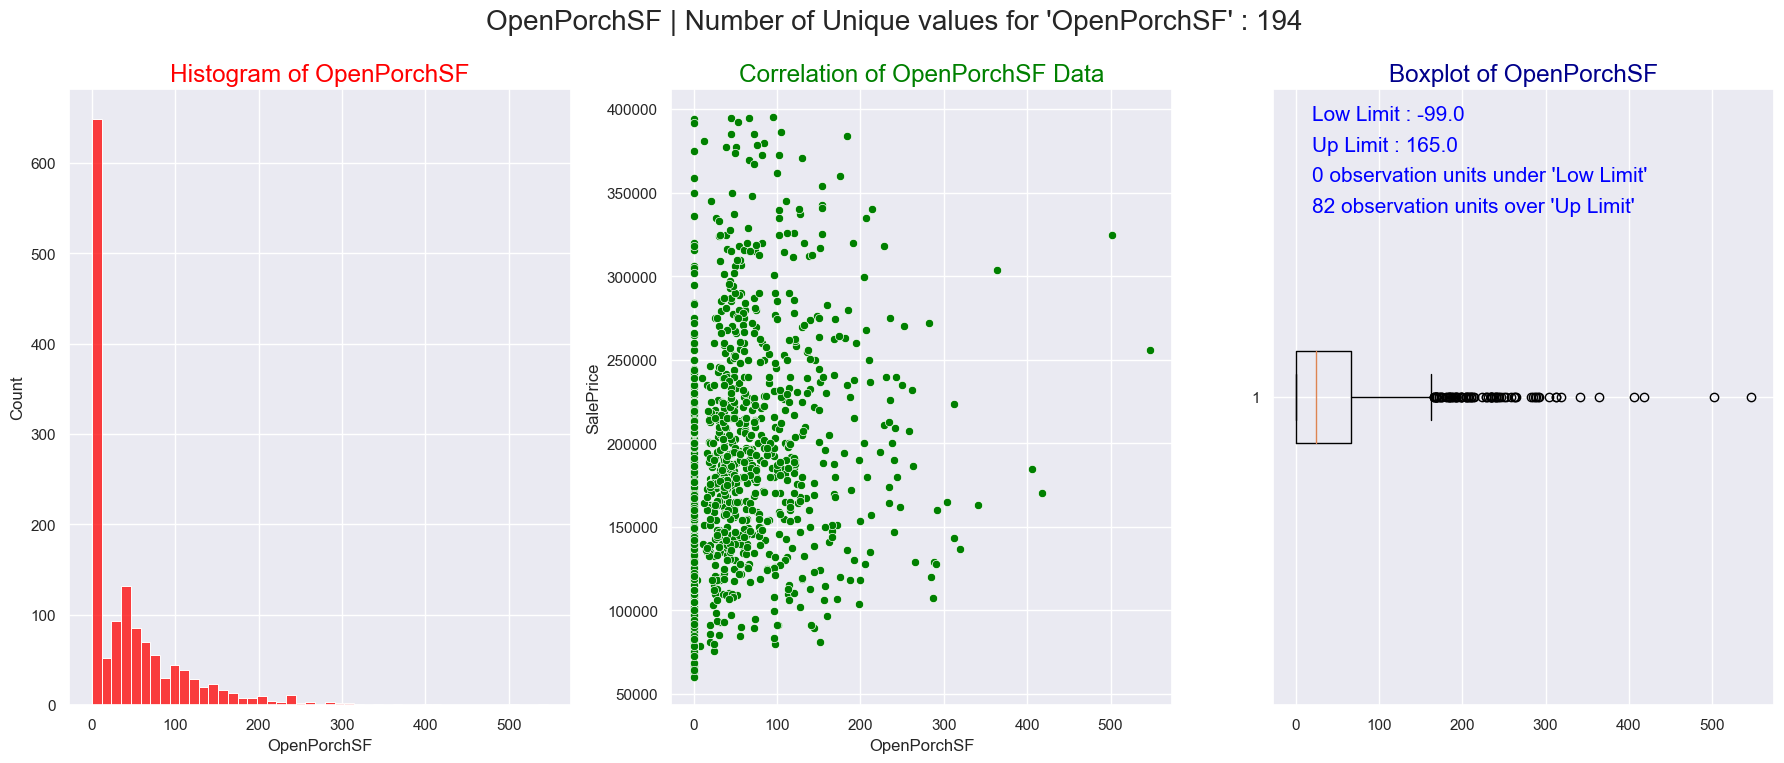

In [52]:
DataAnalysisPipeline(dataframe=df).numerical_plot(col=nunique_over_150[10], target="SalePrice")

In [53]:
DataAnalysisPipeline(df).iqr_values(col=nunique_over_150[10], 
                                    upper_quantile=0.90, 
                                    lower_quantile=0.03, 
                                    info=True, 
                                    replace_with_limit=True)

Low Limit : -99.0
 Up Limit : 227.0
 0 observation units under 'Low Limit'
 37 observation units over 'Up Limit'


(-99.0, 227.0, 0, 37)

## 3.3. Ordinal Encoding

This dataset includes so many ordinal variables. I'll update those ones.

In [54]:
ordinal_variables = []

In [55]:
# BsmtFinType1
DataAnalysisPipeline(df).ordinal_encoding(col="BsmtFinType1", 
                                          ordinal_units_list=['NO_BSMT', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
                                          add_ordinal_list_name=ordinal_variables)

In [56]:
# BsmtQual
DataAnalysisPipeline(df).ordinal_encoding(col="BsmtQual", 
                                          ordinal_units_list=['NO_BSMT', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                          add_ordinal_list_name=ordinal_variables)

In [57]:
# BsmtCond
DataAnalysisPipeline(df).ordinal_encoding(col="BsmtCond", 
                                          ordinal_units_list=['NO_BSMT', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                          add_ordinal_list_name=ordinal_variables)

In [58]:
# BsmtExposure
DataAnalysisPipeline(df).ordinal_encoding(col="BsmtExposure", 
                                          ordinal_units_list=['NO_BSMT', 'No', 'Mn', 'Av', 'Gd'],
                                          add_ordinal_list_name=ordinal_variables)

In [59]:
# BsmtFinType2
DataAnalysisPipeline(df).ordinal_encoding(col="BsmtFinType2", 
                                          ordinal_units_list=['NO_BSMT', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
                                          add_ordinal_list_name=ordinal_variables)

In [60]:
# FireplaceQu
DataAnalysisPipeline(df).ordinal_encoding(col="FireplaceQu", 
                                          ordinal_units_list=['No_FirePlace', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                          add_ordinal_list_name=ordinal_variables)

In [61]:
# GarageFinish
DataAnalysisPipeline(df).ordinal_encoding(col="GarageFinish", 
                                          ordinal_units_list=['No_Garage', 'Unf', 'RFn', 'Fin'],
                                          add_ordinal_list_name=ordinal_variables)

In [62]:
# GarageQual
DataAnalysisPipeline(df).ordinal_encoding(col="GarageQual", 
                                          ordinal_units_list=['No_Garage', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                          add_ordinal_list_name=ordinal_variables)

In [63]:
# GarageCond
DataAnalysisPipeline(df).ordinal_encoding(col="GarageCond", 
                                          ordinal_units_list=['No_Garage', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                          add_ordinal_list_name=ordinal_variables)

In [64]:
# PoolQC
DataAnalysisPipeline(df).ordinal_encoding(col="PoolQC", 
                                          ordinal_units_list=['No_pool', 'Fa', 'TA', 'Gd', 'Ex'],
                                          add_ordinal_list_name=ordinal_variables)

In [65]:
# Fence
DataAnalysisPipeline(df).ordinal_encoding(col="Fence", 
                                          ordinal_units_list=['No_fence', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'],
                                          add_ordinal_list_name=ordinal_variables)

In [66]:
# Utilities
DataAnalysisPipeline(df).ordinal_encoding(col="Utilities", 
                                          ordinal_units_list=['ELO', 'NoSeWa', 'NoSeWr', 'AllPub'],
                                          add_ordinal_list_name=ordinal_variables)

In [67]:
# Alley
DataAnalysisPipeline(df).ordinal_encoding(col="Alley", 
                                          ordinal_units_list=['No_alley_access', 'Pave', 'Grvl'],
                                          add_ordinal_list_name=ordinal_variables)

In [68]:
# Neighborhood
neighborhood_df = DataAnalysisPipeline(df).combine_units(target="SalePrice", observation_units=["Neighborhood"])
neighborhood_ordinal = list(neighborhood_df.sort_values("mean").index)

DataAnalysisPipeline(df).ordinal_encoding(col="Neighborhood", 
                                          ordinal_units_list=neighborhood_ordinal,
                                          add_ordinal_list_name=ordinal_variables)

In [69]:
# HeatingQC
DataAnalysisPipeline(df).ordinal_encoding(col="HeatingQC", 
                                          ordinal_units_list=['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                          add_ordinal_list_name=ordinal_variables)

In [70]:
# CentralAir
DataAnalysisPipeline(df).ordinal_encoding(col="CentralAir", 
                                          ordinal_units_list=['N', 'Y'],
                                          add_ordinal_list_name=ordinal_variables)

In [71]:
# Electrical
DataAnalysisPipeline(df).ordinal_encoding(col="Electrical", 
                                          ordinal_units_list=['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'],
                                          add_ordinal_list_name=ordinal_variables)

In [72]:
# KitchenQual
DataAnalysisPipeline(df).ordinal_encoding(col="KitchenQual", 
                                          ordinal_units_list=['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                          add_ordinal_list_name=ordinal_variables)

In [73]:
# MSZoning
mszoning_df = DataAnalysisPipeline(df).combine_units(target="SalePrice", observation_units=["MSZoning"])
mszoning_ordinal = list(mszoning_df.sort_values("mean").index)

DataAnalysisPipeline(df).ordinal_encoding(col="MSZoning", 
                                          ordinal_units_list=mszoning_ordinal,
                                          add_ordinal_list_name=ordinal_variables)

In [74]:
# LotShape
DataAnalysisPipeline(df).ordinal_encoding(col="LotShape", 
                                          ordinal_units_list=['IR3', 'IR2', 'IR1', 'Reg'],
                                          add_ordinal_list_name=ordinal_variables)

In [75]:
# LandContour
LandContour_df = DataAnalysisPipeline(df).combine_units(target="SalePrice", observation_units=["LandContour"])
LandContour_ordinal = list(LandContour_df.sort_values("mean").index)

DataAnalysisPipeline(df).ordinal_encoding(col="LandContour", 
                                          ordinal_units_list=LandContour_ordinal,
                                          add_ordinal_list_name=ordinal_variables)

In [76]:
ordinal_variables.append("OverallQual")
ordinal_variables.append("OverallCond")

In [77]:
# RoofStyle
RoofStyle_df = DataAnalysisPipeline(df).combine_units(target="SalePrice", observation_units=["RoofStyle"])
RoofStyle_ordinal = list(RoofStyle_df.sort_values("mean").index)

DataAnalysisPipeline(df).ordinal_encoding(col="RoofStyle", 
                                          ordinal_units_list=RoofStyle_ordinal,
                                          add_ordinal_list_name=ordinal_variables)

In [78]:
# RoofMatl
RoofMatl_df = DataAnalysisPipeline(df).combine_units(target="SalePrice", observation_units=["RoofMatl"])
RoofMatl_ordinal = list(RoofMatl_df.sort_values("mean").index)

DataAnalysisPipeline(df).ordinal_encoding(col="RoofMatl", 
                                          ordinal_units_list=RoofMatl_ordinal,
                                          add_ordinal_list_name=ordinal_variables)

In [79]:
for col in categorical:
    if col not in ordinal_variables:
        try:
            col_df = DataAnalysisPipeline(df).combine_units(target="SalePrice", observation_units=[col])
            col_ordinal = list(col_df.sort_values("mean").index)

            DataAnalysisPipeline(df).ordinal_encoding(col=col, 
                                                      ordinal_units_list=col_ordinal,
                                                      add_ordinal_list_name=ordinal_variables)  
        except:
            print(col)

MiscFeature


## 3.4. New Features

Plotting correlation matrix

In [80]:
new_numerical = []
for col in df.columns:
    if df[col].nunique() > 15:
        new_numerical.append(col)

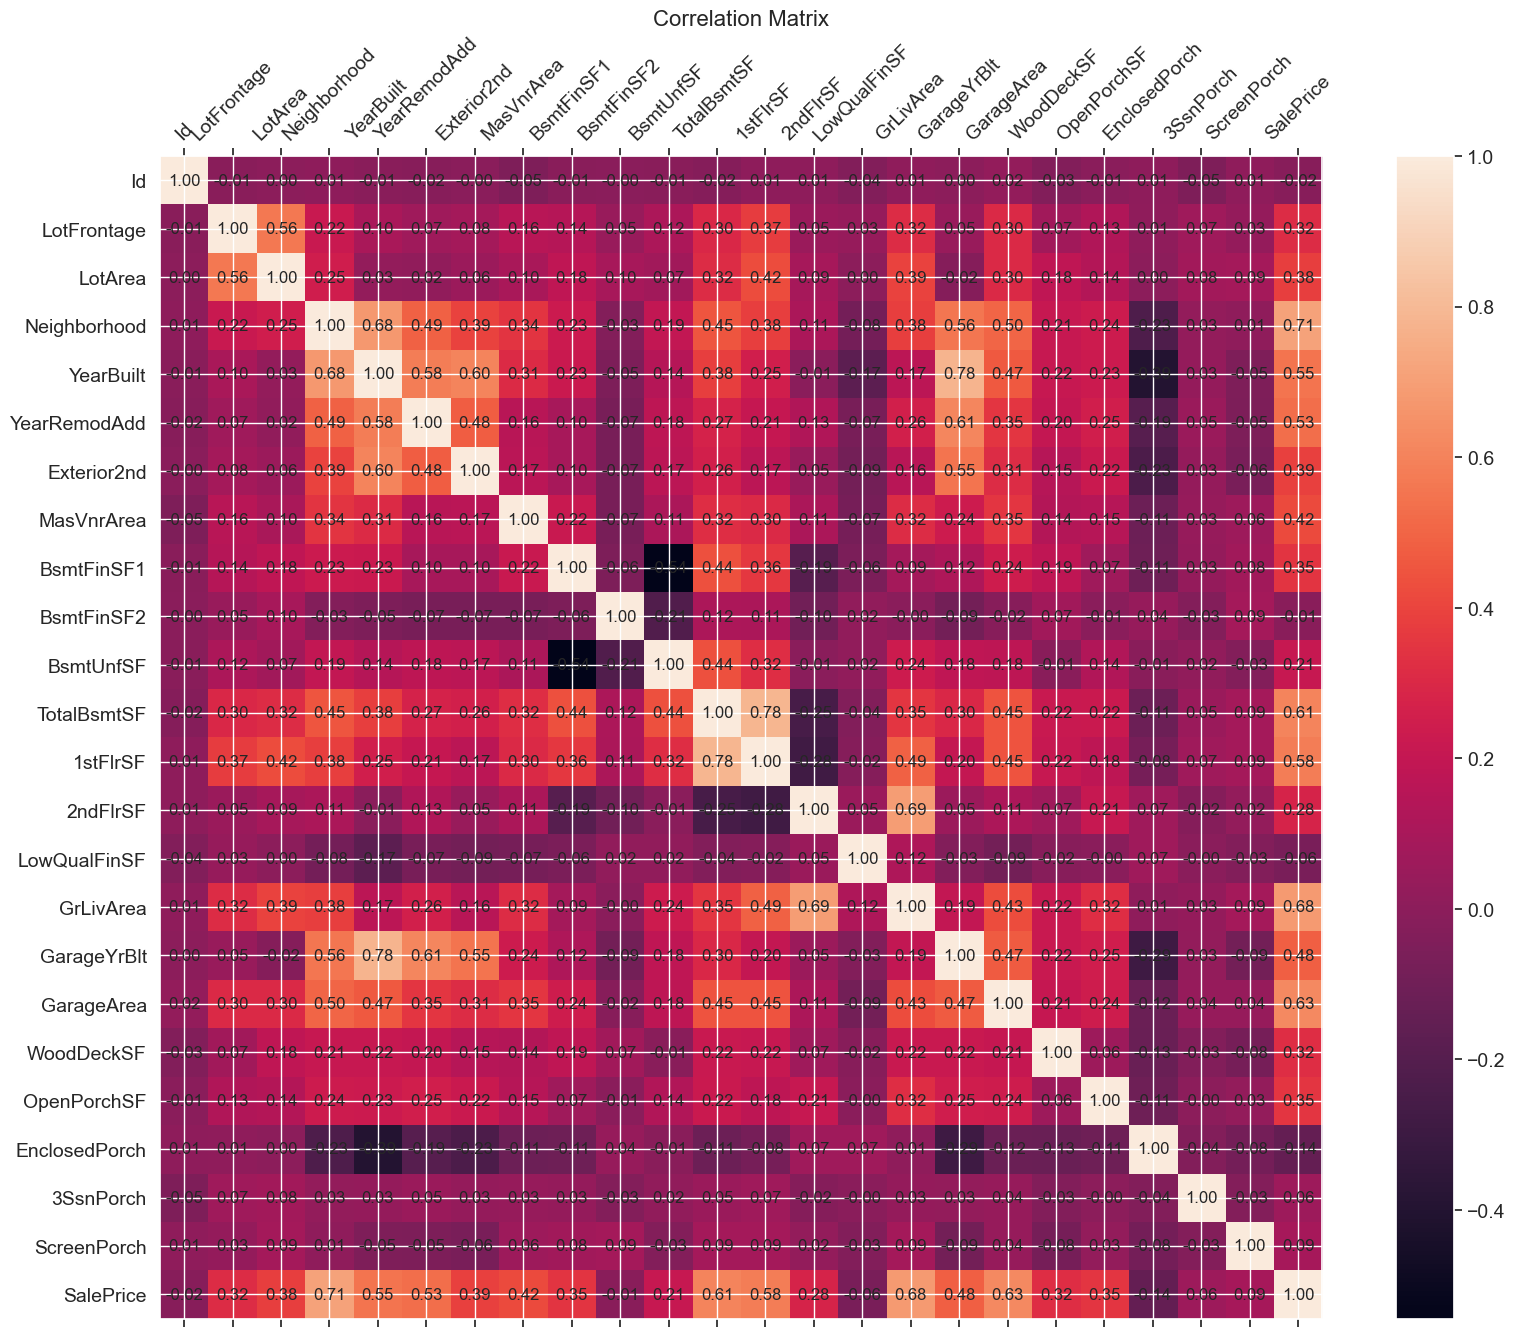

In [81]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df[new_numerical].corr(), fignum=f.number)
plt.xticks(range(df[new_numerical].select_dtypes(["number"]).shape[1]), df[new_numerical].select_dtypes(["number"]).columns, fontsize=14, rotation=45)
plt.yticks(range(df[new_numerical].select_dtypes(["number"]).shape[1]), df[new_numerical].select_dtypes(["number"]).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title("Correlation Matrix", fontsize=16)

corr_matrix = df[new_numerical].corr()
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        plt.text(i, j, f"{corr_matrix.iloc[i, j]:.2f}", ha="center", va="center", fontsize=12)

* House Age (Monthly)

In [82]:
df["NEW_AGE_FOR_MONTH"] = ((df["YrSold"] - df["YearBuilt"]) * 12) + df["MoSold"]

* House RemodAge (Monthly)

In [83]:
df["NEW_REMOD_AGE_FOR_MONTH"] = ((df["YrSold"] - df["YearRemodAdd"]) * 12) + df["MoSold"]

* Total Porch

In [84]:
df["NEW_TOTAL_PORCH"] = df["OpenPorchSF"] + df["EnclosedPorch"] + df["3SsnPorch"] + df["ScreenPorch"]
df["NEW_TOTAL_PORCH"].corr(df["SalePrice"])

0.18843069992610884

* Garage Area Per Car 

In [85]:
df["NEW_GARAGE_AREA_PER_CAR"] = (df["GarageArea"] / df["GarageCars"]) * df["GarageFinish"]

df["NEW_GARAGE_AREA_PER_CAR"].corr(df["SalePrice"])

0.47410881573622216

* Garage Age (Monthly)

In [86]:
df["NEW_GARAGE_AGE_FOR_MONTH"] = ((df["YrSold"] - df["GarageYrBlt"]) * 12) + df["MoSold"]

* Total Rooms AbvGrd / Above grade living area

In [87]:
df["NEW_AREA_PER_ROOM_ABOVE_GRADE"] =  df["TotRmsAbvGrd"] / df["GrLivArea"]

* FirePlaces + CentralAir

In [88]:
df["NEW_CENTRAL_AIR_FIREPLACES"] = df["Fireplaces"] + df["CentralAir"]

* Kitchen / Total Rooms

In [89]:
df["NEW_KITCHEN_TOTAL_ROOMS"] = df["KitchenAbvGr"] / (df["BsmtFullBath"] + df["BsmtHalfBath"] + df["FullBath"] + df["HalfBath"] + df["BedroomAbvGr"] + df["KitchenAbvGr"] + df["TotRmsAbvGrd"])
df["NEW_KITCHEN_TOTAL_ROOMS"].corr(df["SalePrice"])

-0.5381838919126158

#### Last Check that is there any NA value.

In [90]:
DataAnalysisPipeline(df).info(only_isnull=True)

,nunique,isnull,type,count,mean,std,min,25%,50%,75%,max,iscat
NEW_GARAGE_AREA_PER_CAR,519,74,float64,1347.0,484.741648,237.839954,120.0,276.0,480.0,631.666667,2772.0,Numerical


In [91]:
df["NEW_GARAGE_AREA_PER_CAR"].fillna(0, inplace=True)

* * *
## 4. MODEL

In [92]:
X = df.drop(["Id", "SalePrice"], axis=1)
        
y = df["SalePrice"]

In [93]:
# Numerical Scale
rs = RobustScaler()
for col in numerical_:
    try:
        if col != "SalePrice":
            array = np.array(X[col]) 
            array = array.reshape(-1, 1)
            X[col] = rs.fit_transform(array)
    except:
        print(col)

In [94]:
# Categorical Scale
mms = MinMaxScaler()
for col in X.columns:
    if col not in numerical_:
        array = np.array(X[col]) 
        array = array.reshape(-1, 1)
        X[col] = mms.fit_transform(array)

In [95]:
X.drop(["YearBuilt", "YearRemodAdd", "GarageYrBlt"], axis=1, inplace=True)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=98)

### 4.1. LightGBM

In [97]:
# I am updating the column names to be compatible with LightGBM.

import re
X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
X_test = X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

I have tried so many different hyperparameters and finally, I decide to use those parameters.

In [98]:
model = lgb.LGBMRegressor()

hyperparameters = {
    'boosting_type' : ['gbdt'],
    'objective' : ['regression'], 
    'max_bin' : [55], 
    'max_depth' : [4], 
    'subsample' : [0.2], 
    'subsample_freq' : [4], 
    'feature_fraction_seed' : [3], 
    'learning_rate' : [0.01],
    'reg_alpha' : [0.001, 0.01], 
    'reg_lambda' : [0.01, 0.1], 
    'colsample_bytree' : [0.2],
    'min_child_samples' : [30],
    'n_jobs' : [-1],
    'num_iterations' : [75]
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=hyperparameters, cv = 5, verbose=False).fit(X_train, y_train)

In [99]:
random_search.best_params_

{'subsample_freq': 4,
 'subsample': 0.2,
 'reg_lambda': 0.01,
 'reg_alpha': 0.001,
 'objective': 'regression',
 'num_iterations': 75,
 'n_jobs': -1,
 'min_child_samples': 30,
 'max_depth': 4,
 'max_bin': 55,
 'learning_rate': 0.01,
 'feature_fraction_seed': 3,
 'colsample_bytree': 0.2,
 'boosting_type': 'gbdt'}

In [100]:
# final model

lgbm_final = model.set_params(**random_search.best_params_)
lgbm_final.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], eval_metric='rmse', verbose=False)

LGBMRegressor(colsample_bytree=0.2, feature_fraction_seed=3, learning_rate=0.01,
              max_bin=55, max_depth=4, min_child_samples=30, num_iterations=75,
              objective='regression', reg_alpha=0.001, reg_lambda=0.01,
              subsample=0.2, subsample_freq=4)

Plotting Feature importances.

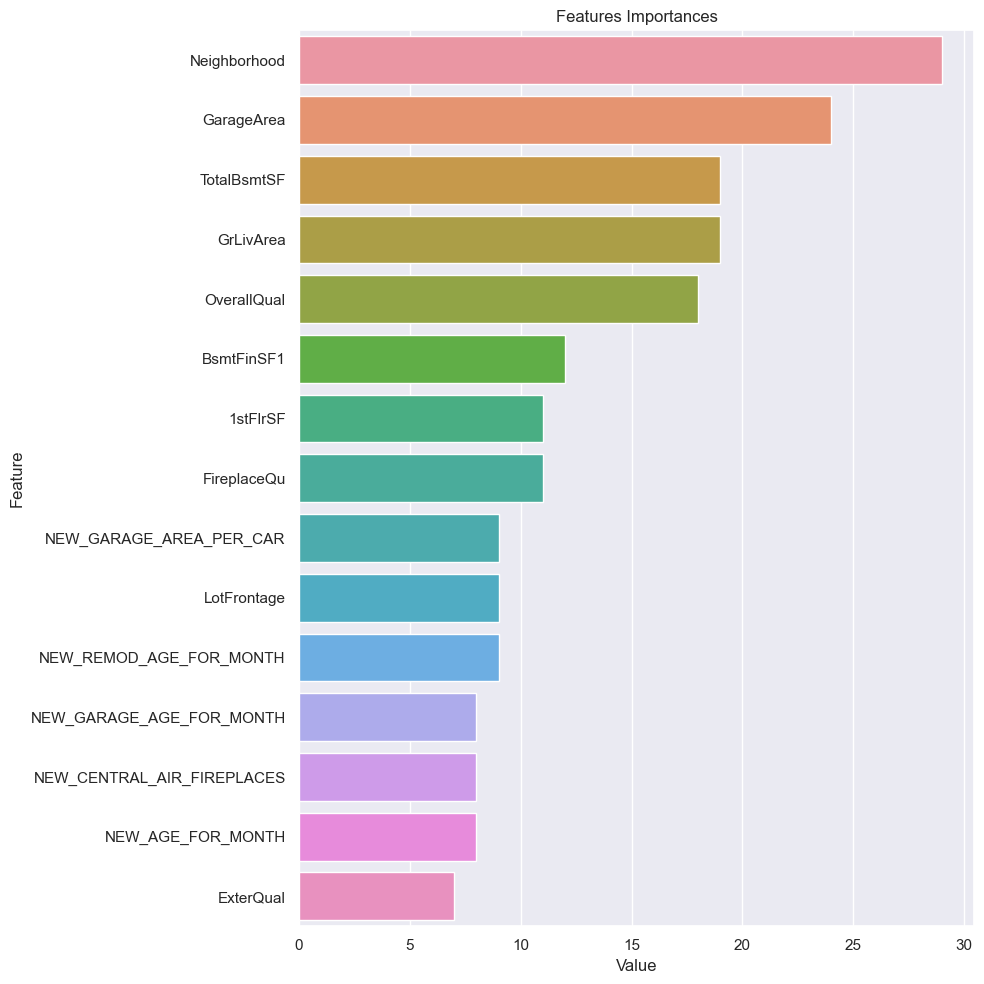

In [101]:
plot_importance(model=lgbm_final, features=X_test, feature_num=15)

Observing error metrics and plotting error curves to based on per iteration for train and test sets.



Train Error:

Mean Absolute Error (MAE): 34181.14729010703
Mean Squared Error (MSE): 2180942651.4921446
Root Mean Squared Error (RMSE): 46700.56371707032
R^2 Score: 0.4978439670598397
RMSLE :  0.25536453987574276


Test Error:

Mean Absolute Error (MAE): 33773.269043349195
Mean Squared Error (MSE): 1975727330.1897118
Root Mean Squared Error (RMSE): 44449.15443728612
R^2 Score: 0.5113639106884755
RMSLE :  0.25817481353253846


Areas under & between curves: 4096909.42

Area Under Train set:
Area Under Test set: 3930190.08
Area Between curves: 166719.34


Error Graphic for per iter:


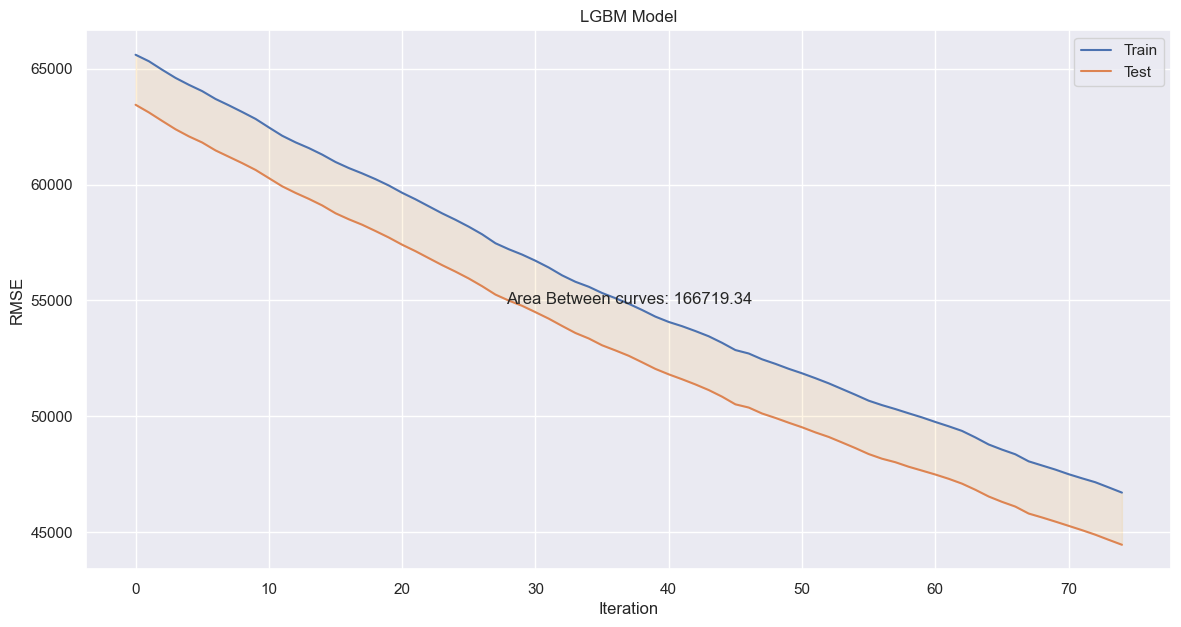

In [102]:
error_metrics(y_train_or_test=[y_train, y_test], 
              x_train_or_test=[X_train, X_test],
              model_type="LGBM", 
              title=["Train", "Test"],
              final_model=lgbm_final, 
              plot_graph=True, figure_size=14, figure_height=7)

In [103]:
# export model

final_model_path = input(r"Please enter the path where you want to save the model :")
lgbm_final.booster_.save_model(final_model_path)

* Predicting for main test dataframe. 

In [104]:
main()

Entire Data RMSE:  25041.31797706359

    Predictions_Y        Based_Y    Id
0  156355.594729  169277.052498  1461
1  162506.252083  187758.393989  1462
2  179978.976388  183583.683570  1463
3  181558.236509  179317.477511  1464
4  190456.958004  150730.079977  1465
5  177740.600003  177150.989247  1466
6  170736.568901  172070.659229  1467
7  175707.363552  175110.956520  1468
8  181628.470423  162011.698832  1469
9  154897.667175  160726.247831  1470

Number of units that (prediction-reel)/reel : x => x < %10 :: 678

Number of units that (prediction-reel)/reel : x => %10 < x < %15 :: 374

Number of units that (prediction-reel)/reel : x => %15 < x < %20 :: 227

Number of units that (prediction-reel)/reel : x => %20 < x < %25 :: 96

Number of units that (prediction-reel)/reel : x => %25 < x :: 84
Prediction finished.
Function finished.
